
# Multiple Linear Regression Model with Gradient Descendent Optimization
  

## Objectives

* Use scikit-learn to implement Multiple Linear Regression 
* Create a model, train it, test it and use the model
* Explain the role of the optimization algorithmics and when to use them
* Create 3D plot with optimization algorithmics


In [ ]:
"""Gradient descent is an optimization algorithm which is commonly-used to 
train machine learning models and neural networks.  Training data helps 
these models learn over time, and the cost function within gradient descent 
specifically acts as a barometer, gauging its accuracy with each iteration of 
parameter updates. Until the function is close to or equal to zero, the model 
will continue to adjust its parameters to yield the smallest possible error. 
Once machine learning models are optimized for accuracy, they can be powerful 
tools for artificial intelligence
(AI) and computer science applications."""

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#prediction">Interpretation</a></li>        
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [1]:
#!pip install dtale
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import warnings
import dtale
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
#from ExploriPy import EDA
#from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport


warnings.filterwarnings('ignore')
%matplotlib inline

### Downloading Data and Reading the data in
we will use the link, to download it from IBM Object Storage.


In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

df = pd.read_csv('FuelConsumptionCo2.csv')

df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [3]:
df.tail

<bound method NDFrame.tail of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [6]:
df.describe().T

count         mean        std     min      25%  \
MODELYEAR                 1067.0  2014.000000   0.000000  2014.0  2014.00   
ENGINESIZE                1067.0     3.346298   1.415895     1.0     2.00   
CYLINDERS                 1067.0     5.794752   1.797447     3.0     4.00   
FUELCONSUMPTION_CITY      1067.0    13.296532   4.101253     4.6    10.25   
FUELCONSUMPTION_HWY       1067.0     9.474602   2.794510     4.9     7.50   
FUELCONSUMPTION_COMB      1067.0    11.580881   3.485595     4.7     9.00   
FUELCONSUMPTION_COMB_MPG  1067.0    26.441425   7.468702    11.0    21.00   
CO2EMISSIONS              1067.0   256.228679  63.372304   108.0   207.00   

                             50%      75%     max  
MODELYEAR                 2014.0  2014.00  2014.0  
ENGINESIZE                   3.4     4.30     8.4  
CYLINDERS                    6.0     8.00    12.0  
FUELCONSUMPTION_CITY        12.6    15.55    30.2  
FUELCONSUMPTION_HWY          8.8    10.85    20.5  
FUELCONSUMPTION_COMB        10.9    13.35    25.8  
FUELCONSUMPTION_COMB_MPG    26.0    31.00    60.0  
CO2EMISSIONS               251.0   294.00   488.0


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [7]:
#Separate categorical variables and numerical variables

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print('Categorical Variables:', cat_cols)
print('Numerical Variables:', num_cols)

Categorical Variables: Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')
Numerical Variables: ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


In [8]:
#Convert object to category
df[cat_cols] = df[cat_cols].astype('category')
print(df.dtypes)

MODELYEAR                      int64
MAKE                        category
MODEL                       category
VEHICLECLASS                category
ENGINESIZE                   float64
CYLINDERS                      int64
TRANSMISSION                category
FUELTYPE                    category
FUELCONSUMPTION_CITY         float64
FUELCONSUMPTION_HWY          float64
FUELCONSUMPTION_COMB         float64
FUELCONSUMPTION_COMB_MPG       int64
CO2EMISSIONS                   int64
dtype: object


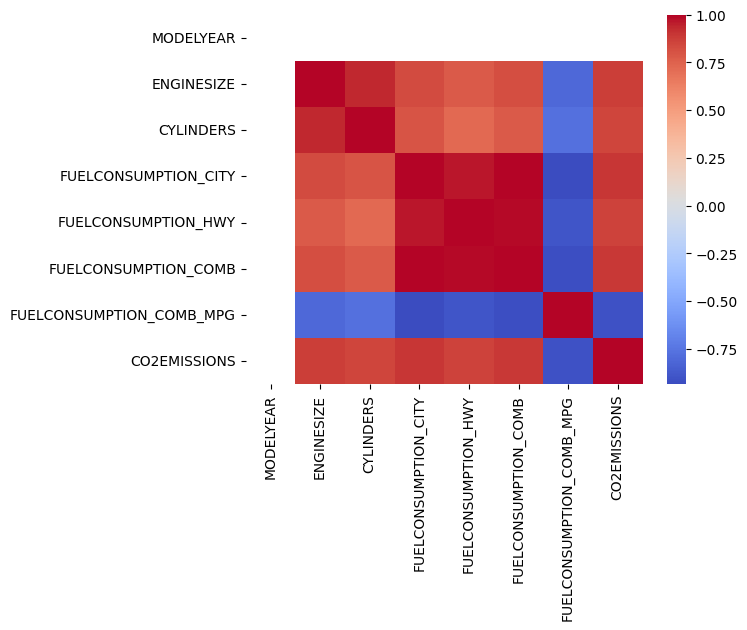

In [9]:
#correlation plot
corr = df[num_cols].corr()
sns.heatmap(corr, annot =True, cmap='coolwarm')
plt.show()

Let's select some features that we want to use for regression.


In [10]:
#####Interactive plot - Just amazing - Enjoy
#!pip install plotly --upgrade
pio.renderers.default = 'notebook' #or jupyterlab if this is the case
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'df' is your DataFrame

# Select categorical and numerical data
categorical_df = df.select_dtypes(include=['object', 'category'])
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns='CO2EMISSIONS').columns

# Calculate the total number of subplots needed
total_plots = len(categorical_df.columns) + len(numerical_columns)
n_cols = 2  # Number of columns per row in the subplot grid
n_rows = (total_plots + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplot figure
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=list(categorical_df.columns) + list(numerical_columns))

# Add horizontal bar plots for categorical columns to subplots
for i, column in enumerate(categorical_df.columns):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    fig.add_trace(
        go.Bar(
            y=categorical_df[column].value_counts().index,
            x=categorical_df[column].value_counts().values,
            orientation='h',
            name=column
        ),
        row=row,
        col=col
    )

# Add scatter plots for numerical columns to subplots
for j, column in enumerate(numerical_columns, start=i+1):
    row = (j // n_cols) + 1
    col = (j % n_cols) + 1

    fig.add_trace(
        go.Scatter(
            x=df[column],
            y=df['CO2EMISSIONS'],
            mode='markers',
            name=column
        ),
        row=row,
        col=col
    )
  
# Update layout if needed
fig.update_layout(height=300*n_rows, showlegend=False, title_text="Categorical Distributions and Numerical vs CO2EMISSIONS")
fig.show()


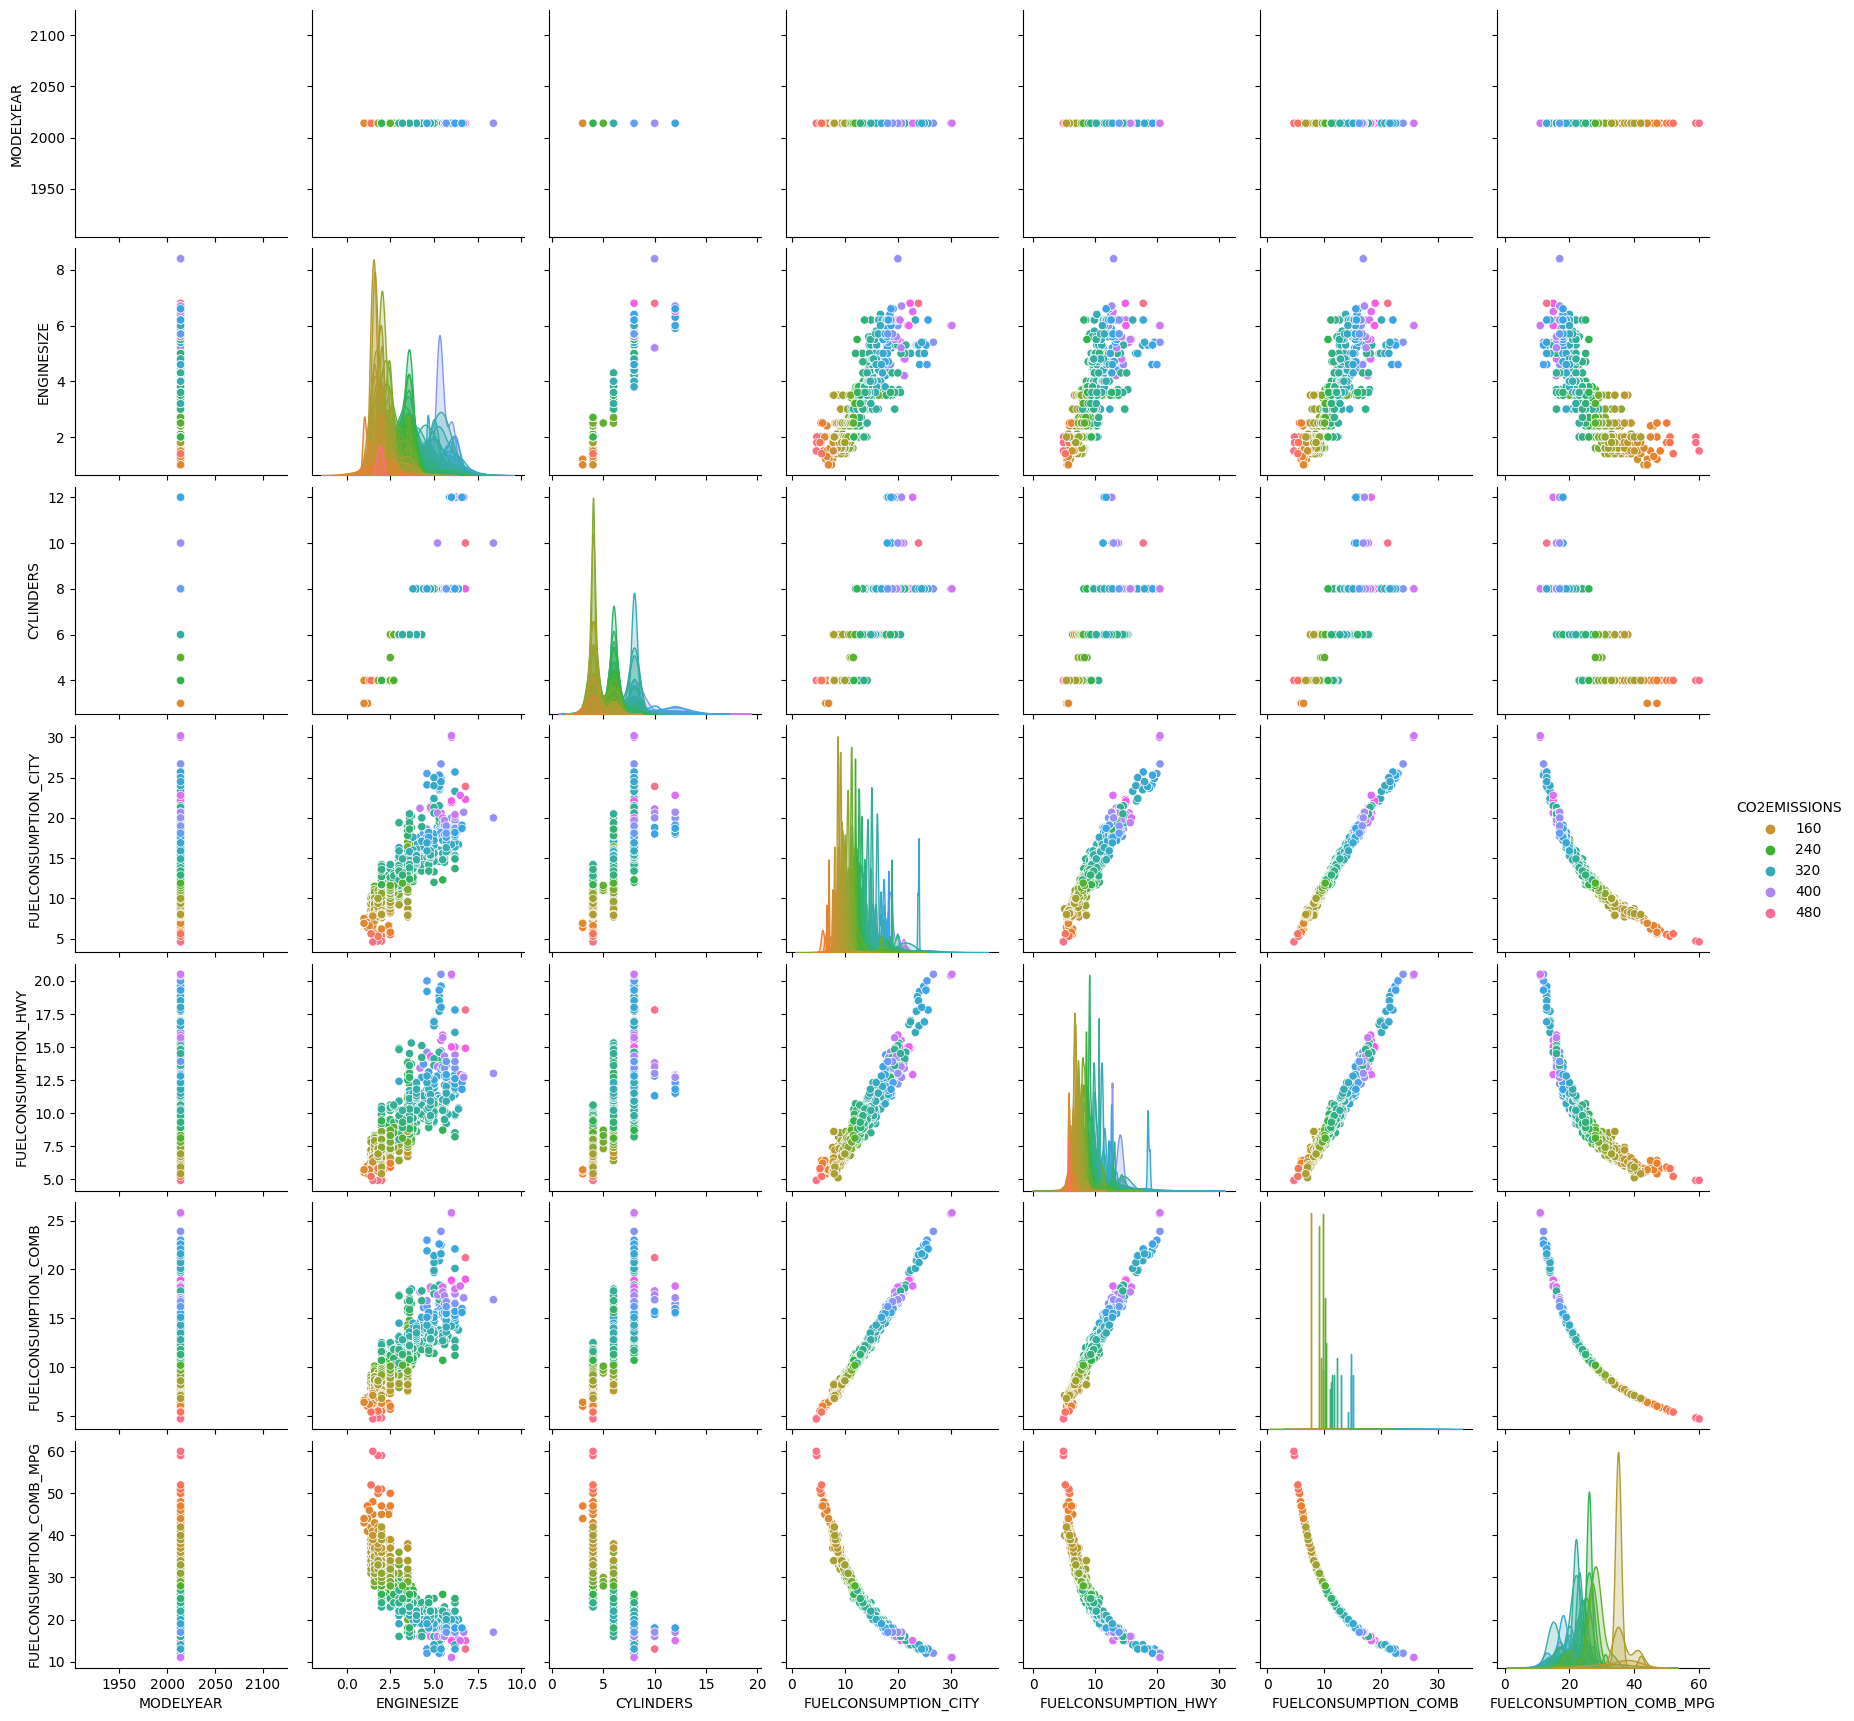

In [11]:
sns.pairplot(df, hue='CO2EMISSIONS', diag_kind = 'kde',
             kind = 'scatter', palette='husl')

In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   
5         3.5          6                  11.9                  7.7   
6         3.5          6                  11.8                  8.1   
7         3.7          6                  12.8                  9.0   
8         3.7          6                  13.4                  9.5   

   FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                   8.5           196  
1                   9.6           221  
2                   5.9           136  
3                  11.1           255  
4                  10.6           244  
5                  10.0           230  
6                  10.1           232  
7                  11.1           255  
8                  11.6           267

Let's plot Emission values with respect to Engine size:


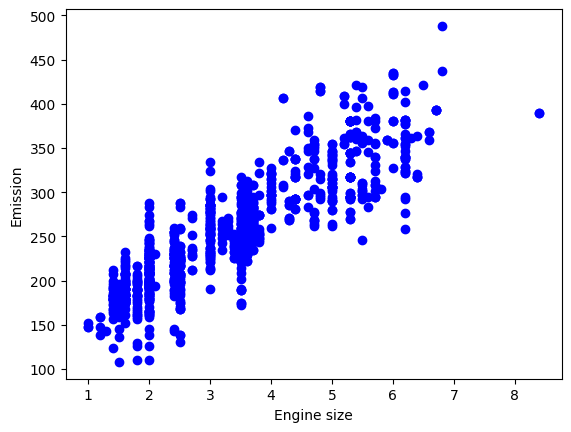

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 


In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


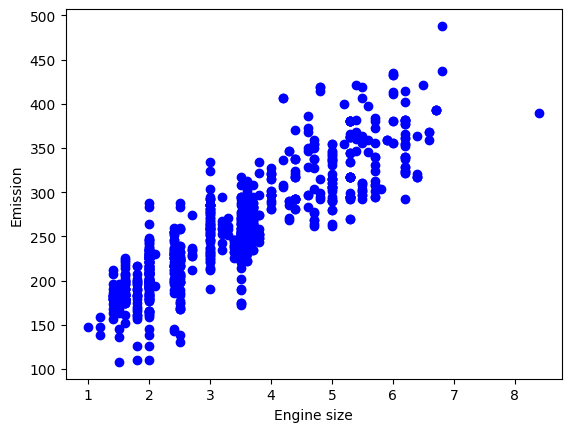

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.80698378  6.90545664  9.6217756 ]]


As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


# Prediction with 5 independent variables

The cost function, also known as a loss function or error function, is a mathematical function used in optimization and machine learning to evaluate how well a model is performing. The function quantifies the difference between the predicted values by the model and the actual values of the data. The goal of an optimization algorithm is to minimize the cost function, which corresponds to improving the model's performance.
Here is a more detailed explanation of the concept:
Definition
For regression problems, a common cost function is the Mean Squared Error (MSE), defined as: J(θ)= 2m1 ∑ i=1m (h θ (x (i) )−y (i) ) 2
  where h θ(x) is the hypothesis or prediction made by the model for input x, y is the true value, θ represents the model's parameters, and m is the number of training examples.

For classification problems, especially binary classification, the cost function often used is the Cross-Entropy loss or Log Loss: J(θ)=− 
m1 ∑ i=1m [y (i) log(h θ (x (i) ))+(1−y (i) )log(1−h θ (x (i) ))] where h θ(x) is typically the predicted probability that the output is 1.

Properties
Non-negative: Cost functions are designed to be non-negative, meaning the lowest 
    possible value is zero, which would indicate a perfect model fit.
Differentiability: In most cases, cost functions are chosen to be differentiable with 
    respect to the model parameters. This property is crucial for optimization algorithms 
    like gradient descent, which require gradients to update parameters.
Role in Machine Learning
Model Training: During training, the model adjusts its parameters to minimize the cost function. 
    The optimization algorithm iterates over the training data and continually adjusts the parameters 
    to find the minimum value of the cost function.
Evaluation: The cost function can also be used to evaluate the model's performance on validation
    or test data. However, in practice, it's common to use other metrics alongside the cost function
    to get a more comprehensive view of performance.
Challenges
Local Minima: Especially in complex models like deep neural networks, the cost function landscape 
    can have multiple valleys (local minima). The algorithm might converge to a local minimum that 
    is not the global minimum (the absolute lowest point).
Overfitting: If the cost function is minimized too well on the training data, the model might become 
    too specialized to this data and fail to generalize to unseen data.
Regularization
Regularization terms are often added to the cost function to control overfitting. These terms penalize 
the complexity of the model (e.g., large coefficients in a regression model) and can help the model 
generalize better to new data.

In summary, the cost function is a central component in training machine learning models as it provides 
a quantitative measure of how wrong a model's predictions are. By minimizing the cost function, one aims 
to improve the accuracy and predictive power of the model.

In [17]:
# Selecting the relevant columns for R and T
#We are going to optimize applying gradient descending
R = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
        'FUELCONSUMPTION_COMB']].values
T = df['CO2EMISSIONS'].values

# Normalize the features
scaler = StandardScaler()
R_normalized = scaler.fit_transform(R)

# Gradient descent function
def gradient_descent(R, T, learning_rate=0.001, num_iterations=1000):
    m, n = R.shape
    theta = np.zeros(n + 1)  # +1 for the bias term
    cost_history = []  # To store values of the cost function over iterations

    for _ in range(num_iterations):
        predictions = np.dot(R, theta[1:]) + theta[0]
        errors = predictions - T
        gradient = (1/m) * R.T.dot(errors)
        theta[1:] -= learning_rate * gradient
        theta[0] -= learning_rate * (1/m) * np.sum(errors)

        # Compute and store the cost for the current iteration
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

# Add the bias term to R_normalized
R_normalized_bias = np.c_[np.ones(R_normalized.shape[0]), R_normalized]

# Run gradient descent
theta, cost_history = gradient_descent(R_normalized_bias, T)

# Display the optimal parameters and the first 10 cost history values
print("Optimal parameters:", theta)
print("Initial cost history:", cost_history[:10])


Optimal parameters: [110.81063722 110.81063722  12.96272679  12.69507678  12.39997034
  11.44923925  12.15924252]
Initial cost history: [34832.710402999066, 34686.198206769775, 34540.346289136876, 34395.15134739736, 34250.61009794199, 34106.71927612671, 33963.47563614496, 33820.87595090101, 33678.91701188424, 33537.59562904433]


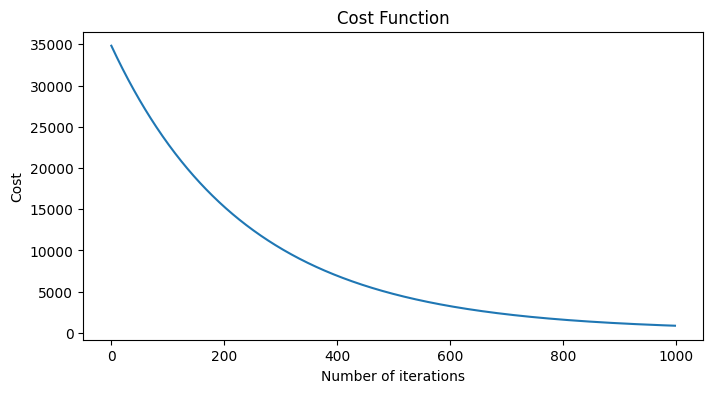

In [18]:
#2D plot for cost history

plt.figure(figsize=(8,4))
plt.plot(cost_history)
plt.title('Cost Function')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

Optimization methods are algorithms or techniques used to find the best solution or the most favorable outcome for a particular problem, often within a specific set of constraints. In machine learning, optimization methods are used to minimize a cost function, which is a measure of how far off a model's predictions are from the actual results. Here's an overview of optimization methods, including gradient descent:

1. Gradient Descent
Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a function. Here's how it works:

Objective: Minimize the cost function J(θ).
Process: Adjust the parameters θ incrementally, based on the negative gradient of the cost function at the current point.
Algorithm:
Initialize parameters θ randomly.
Compute the gradient ∇ 
θ
 J(θ), which indicates the direction of the steepest ascent.
Update the parameters in the opposite direction of the gradient: θ=θ−α∇ 
θ
 J(θ), where α is the learning rate.
Repeat until convergence, which occurs when ∇ 
θ
 J(θ) is close to zero or after a set number of iterations.
Variants of Gradient Descent
Batch Gradient Descent: Uses the entire dataset to compute the gradient of the cost function for each iteration.
Stochastic Gradient Descent (SGD): Uses only one data point (chosen randomly) to compute the gradient and update the parameters for each iteration. This can be faster and can avoid local minima but may be less stable.
Mini-batch Gradient Descent: Uses a small subset of the data (a mini-batch) to compute the gradient and update parameters. It is a compromise between Batch GD and SGD.
2. Momentum
Momentum helps accelerate gradient descent by moving more quickly along the relevant directions and dampening oscillations. It modifies the update rule by considering the past gradients:

θ=θ−α∇ 
θ
 J(θ)+βv 
previous
 

3. Nesterov Accelerated Gradient (NAG)
NAG is a way to give gradient descent a better idea of where its future steps should head by calculating the gradient at a position ahead in the direction of the momentum.

4. Adagrad
Adagrad adapts the learning rate to the parameters, allowing for larger updates for infrequent parameters and smaller updates for frequent parameters.

5. RMSprop
RMSprop divides the learning rate by an exponentially decaying average of squared gradients to adapt the learning rate for each of the parameters.

6. Adam (Adaptive Moment Estimation)
Adam combines ideas from both Momentum and RMSprop. In addition to storing an exponentially decaying average of past squared gradients like RMSprop, Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

7. Newton's Method
Newton's Method is a second-order optimization algorithm that uses the second derivative (or Hessian) to find the minimum of a function. It converges much faster than gradient descent but is more computationally expensive due to the calculation of second derivatives.

8. Conjugate Gradient
Conjugate Gradient is an algorithm for the numerical solution of particular systems of linear equations, particularly those whose matrix is symmetric and positive-definite. It's also used as a method for non-linear optimization problems.

Each optimization method has its own trade-offs and is suited for different types of problems. The choice of the optimization method can depend on several factors, including the size and nature of the dataset, the complexity of the cost function, and computational resources. Gradient descent and its variants are among the most popular optimization methods in machine learning, especially for training deep neural networks.



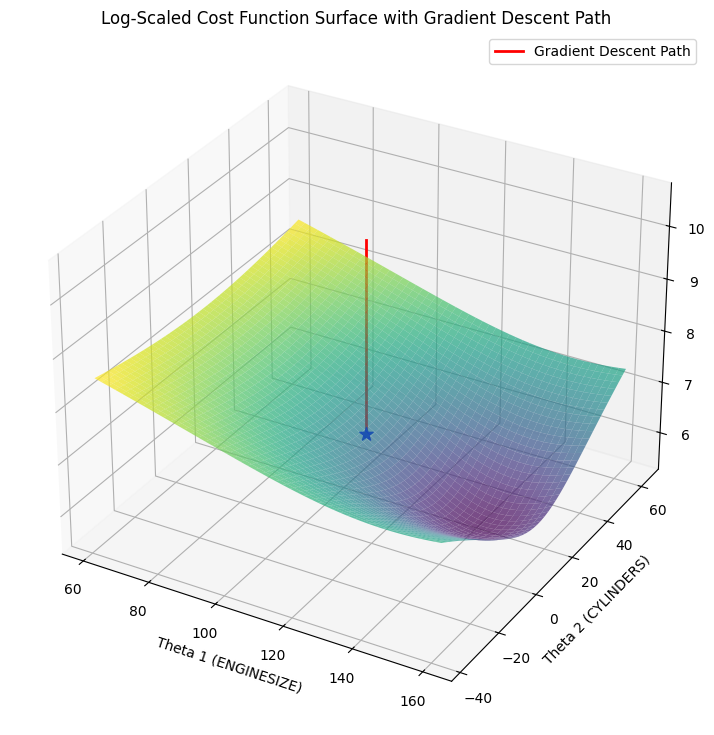

In [19]:
#Optimizing the results with gradient descending
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'theta' and 'cost_history' are obtained from the gradient descent function in your code
# and 'R_normalized_bias' and 'T' are your feature set and target variable, respectively.

def compute_cost_with_bias(theta, R, T):
    m = len(T)
    predictions = np.dot(R, theta[1:]) + theta[0]
    errors = predictions - T
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

# Define an extended range for theta values
theta1_extended_range = np.linspace(theta[1] - 50, theta[1] + 50, 50)
theta2_extended_range = np.linspace(theta[2] - 50, theta[2] + 50, 50)
theta1_grid_extended, theta2_grid_extended = np.meshgrid(theta1_extended_range, theta2_extended_range)

# Calculate the cost values over the extended grid
cost_values_extended = np.zeros_like(theta1_grid_extended)
for i in range(theta1_grid_extended.shape[0]):
    for j in range(theta2_grid_extended.shape[1]):
        temp_theta = np.array([theta[0], theta1_grid_extended[i, j], theta2_grid_extended[i, j]] + list(theta[3:]))
        cost_values_extended[i, j] = compute_cost_with_bias(temp_theta, R_normalized_bias, T)

# Log-scale the costs for better visualization
cost_values_extended_log = np.log(cost_values_extended + 1)  # Adding 1 to avoid log(0)

# Create the 3D plot with an extended range
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with log-scaled costs
ax.plot_surface(theta1_grid_extended, theta2_grid_extended, cost_values_extended_log, cmap='viridis', alpha=0.7)

# Extract the gradient descent path
theta_path_1 = [theta[1]] * len(cost_history)
theta_path_2 = [theta[2]] * len(cost_history)

# Plot the gradient descent path on the log-scaled surface
ax.plot(theta_path_1, theta_path_2, np.log(np.array(cost_history) + 1), 'r-', linewidth=2, label='Gradient Descent Path')

# Add a star marker at the final point of the gradient descent
ax.scatter(theta_path_1[-1], theta_path_2[-1], np.log(cost_history[-1] + 1), color='b', s=100, marker='*')

# Set labels and title
ax.set_xlabel('Theta 1 (ENGINESIZE)')
ax.set_ylabel('Theta 2 (CYLINDERS)')
ax.set_zlabel('Log(Cost)')
ax.set_title('Log-Scaled Cost Function Surface with Gradient Descent Path')

# Show the plot
plt.legend()
plt.show()

The normalization of features and adjustment of the learning rate has 
resolved the overflow issue. The gradient descent function now returns 
a list of optimal parameters and 
a history of the cost function that converges properly.

Here are the optimal parameters:
Bias term: ≈110.81
ENGINESIZE coefficient: ≈110.81
CYLINDERS coefficient: ≈12.96
FUELCONSUMPTION_CITY coefficient: ≈12.70
FUELCONSUMPTION_HWY coefficient: ≈12.40
FUELCONSUMPTION_COMB coefficient: ≈11.45
And the first ten values of the cost history show that the cost function 
is decreasing, which indicates that the gradient descent is working correctly.

###Interpretations:

The results from the gradient descent optimization give us a set of 
parameters (theta values) that represent the coefficients for the 
linear regression model, including a bias term (intercept). 
Here's what each part of the result signifies:

Bias term (theta[0]): This is the intercept of the linear model. 
    It represents the value of the target variable (CO2 emissions) when 
    all the feature values are zero. In the normalized feature space, it 
    essentially represents the average CO2 emissions because normalization 
    centers the features around zero.

Feature coefficients (theta[1:]) represent the impact each feature has on 
the CO2 emissions. Since we have normalized our features, these coefficients 
are telling us how much a one standard deviation increase in the feature will
affect the CO2 emissions, holding all other features constant.

The first ten values of the cost history show the cost of the model at the
first ten iterations of gradient descent. The cost function used is the 
Mean Squared Error (MSE) function, divided by 2. The consistent decrease 
in the cost value with each iteration indicates that the gradient descent 
algorithm is working correctly: it is minimizing the cost function, 
thereby improving the model's parameters with each step.

Given that we have normalized our features, the coefficients can be 
compared directly to each other:

ENGINESIZE (theta[1]): The engine size has a significant positive coefficient, 
    which means that as the engine size increases, the CO2 emissions also increase.

CYLINDERS (theta[2]): Similar to engine size, the number of cylinders also
    has a positive relationship with CO2 emissions.

FUELCONSUMPTION_CITY (theta[3]): This represents the fuel consumption in 
    the city. The positive coefficient indicates that higher city fuel 
    consumption is associated with higher CO2 emissions.

FUELCONSUMPTION_HWY (theta[4]): This is the fuel consumption on the highway. 
    It also has a positive coefficient, indicating a similar relationship with 
    CO2 emissions as city fuel consumption.

FUELCONSUMPTION_COMB (theta[5]): This is the combined fuel consumption 
    (a weighted average of city and highway consumption). It has a 
    positive coefficient, showing that an increase in combined fuel 
    consumption leads to an increase in CO2 emissions.

# Prediction wiht 3 independent variables

In [20]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared error(MSE): %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared error(MSE): 577.38
Variance score: 0.85


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.


# Prediction with 4 independent variables

In [21]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                         'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x,y)
print('Coefficients: ', regr.coef_)
y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                         'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY'
                        ,'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))                         

Coefficients:  [[11.92564548  6.39437593  6.60467976  2.59754867]]
Residual sum of squares: 581.92
Variance score: 0.85


#Another Examples of optimization algotithmics and when to use them

    1. Gradient Descent
Gradient Descent is a first-order iterative optimization algorithm used to find the minimum of a function. Here's how it works:

Objective: Minimize the cost function J(θ).
Process: Adjust the parameters θ incrementally, based on the negative gradient of the cost function at the current point.
Algorithm:
Initialize parameters θ randomly.
Compute the gradient ∇ θ J(θ), which indicates the direction of the steepest ascent.
Update the parameters in the opposite direction of the gradient: θ=θ−α∇ θ J(θ), where α is the learning rate.
Repeat until convergence, which occurs when ∇ θ J(θ) is close to zero or after a set number of iterations.
Variants of Gradient Descent
Batch Gradient Descent: Uses the entire dataset to compute the gradient of the cost function for each iteration.
Stochastic Gradient Descent (SGD): Uses only one data point (chosen randomly) to compute the gradient and update the 
parameters for each iteration. This can be faster and can avoid local minima but may be less stable.
Mini-batch Gradient Descent: Uses a small subset of the data (a mini-batch) to compute the gradient and update parameters. 
    It is a compromise between Batch GD and SGD.

    2. Momentum
Momentum helps accelerate gradient descent by moving more quickly along the relevant directions and dampening oscillations. 
It modifies the update rule by considering the past gradients:

θ=θ−α∇ θJ(θ)+βv 

    3. Nesterov Accelerated Gradient (NAG)
NAG is a way to give gradient descent a better idea of where its future steps should head by calculating the gradient at a position ahead 
in the direction of the momentum.

    4. Adagrad
Adagrad adapts the learning rate to the parameters, allowing for larger updates for infrequent parameters and smaller updates for frequent 
parameters.

    5. RMSprop
RMSprop divides the learning rate by an exponentially decaying average of squared gradients to adapt the learning rate for each of the parameters.

    6. Adam (Adaptive Moment Estimation)
Adam combines ideas from both Momentum and RMSprop. In addition to storing an exponentially decaying average of past squared gradients like 
RMSprop, Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

    7. Newton's Method
Newton's Method is a second-order optimization algorithm that uses the second derivative (or Hessian) to find the minimum of a function. 
It converges much faster than gradient descent but is more computationally expensive due to the calculation of second derivatives.

    8. Conjugate Gradient
Conjugate Gradient is an algorithm for the numerical solution of particular systems of linear equations, particularly those whose matrix 
is symmetric and positive-definite. It's also used as a method for non-linear optimization problems.

Each optimization method has its own trade-offs and is suited for different types of problems. The choice of the optimization method can 
depend on several factors, including the size and nature of the dataset, the complexity of the cost function, and computational resources. 
Gradient descent and its variants are among the most popular optimization methods in machine learning, especially for training deep neural 
networks.